<a href="https://colab.research.google.com/github/vaibhav-prasad707/traffic_reinforcement/blob/main/bangalore_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load your dataset (replace with actual path)
# Example: df = pd.read_csv('/content/Bangalore_traffic_Dataset.csv')
df = pd.read_csv('Banglore_traffic_Dataset.csv')

# Quick peek
print(df.head())
print(df.info())

         Date    Area Name Road/Intersection Name  Traffic Volume  \
0  2022-01-01  Indiranagar          100 Feet Road           50590   
1  2022-01-01  Indiranagar               CMH Road           30825   
2  2022-01-01   Whitefield    Marathahalli Bridge            7399   
3  2022-01-01  Koramangala    Sony World Junction           60874   
4  2022-01-01  Koramangala          Sarjapur Road           57292   

   Average Speed  Travel Time Index  Congestion Level  \
0      50.230299           1.500000        100.000000   
1      29.377125           1.500000        100.000000   
2      54.474398           1.039069         28.347994   
3      43.817610           1.500000        100.000000   
4      41.116763           1.500000        100.000000   

   Road Capacity Utilization  Incident Reports  Environmental Impact  \
0                 100.000000                 0               151.180   
1                 100.000000                 1               111.650   
2                  36.3965

In [4]:
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour


In [5]:
def categorize_congestion(x):
    if x <= 30:
        return 'Low'
    elif x <= 70:
        return 'Medium'
    else:
        return 'High'

df['Congestion_Level_Label'] = df['Congestion Level'].apply(categorize_congestion)


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Area_Code'] = le.fit_transform(df['Area Name'])
df['Road_Code'] = le.fit_transform(df['Road/Intersection Name'])
df['Congestion_Level_Code'] = le.fit_transform(df['Congestion_Level_Label'])


# Visualization

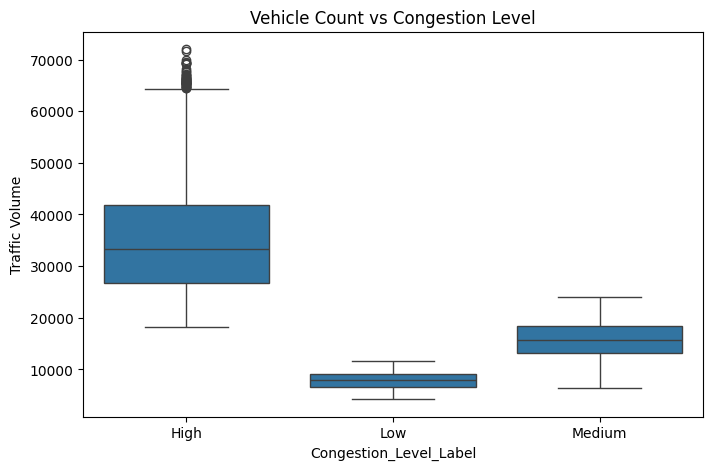

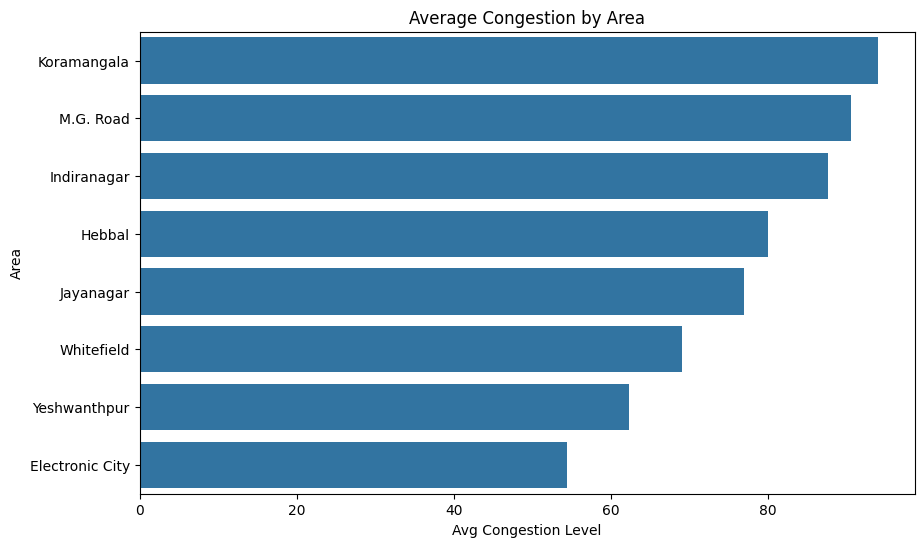

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Congestion_Level_Label', y='Traffic Volume', data=df)
plt.title('Vehicle Count vs Congestion Level')
plt.show()

heat_data = df.groupby('Area Name')['Congestion Level'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=heat_data.values, y=heat_data.index)
plt.title('Average Congestion by Area')
plt.xlabel('Avg Congestion Level')
plt.ylabel('Area')
plt.show()


In [8]:
features = ['Traffic Volume', 'Average Speed', 'Travel Time Index', 'Road Capacity Utilization',
            'Incident Reports', 'Environmental Impact', 'Area_Code', 'Road_Code']

X = df[features]
y = df['Congestion_Level_Code']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1285
           1       0.79      0.68      0.73        68
           2       0.90      0.89      0.89       435

    accuracy                           0.95      1788
   macro avg       0.89      0.85      0.87      1788
weighted avg       0.95      0.95      0.95      1788



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1285
           1       0.77      0.65      0.70        68
           2       0.90      0.88      0.89       435

    accuracy                           0.95      1788
   macro avg       0.88      0.84      0.86      1788
weighted avg       0.95      0.95      0.95      1788



In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1285
           1       0.81      0.68      0.74        68
           2       0.89      0.90      0.89       435

    accuracy                           0.95      1788
   macro avg       0.89      0.85      0.87      1788
weighted avg       0.95      0.95      0.95      1788



In [13]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1285
           1       0.84      0.63      0.72        68
           2       0.87      0.87      0.87       435

    accuracy                           0.94      1788
   macro avg       0.89      0.83      0.85      1788
weighted avg       0.94      0.94      0.94      1788



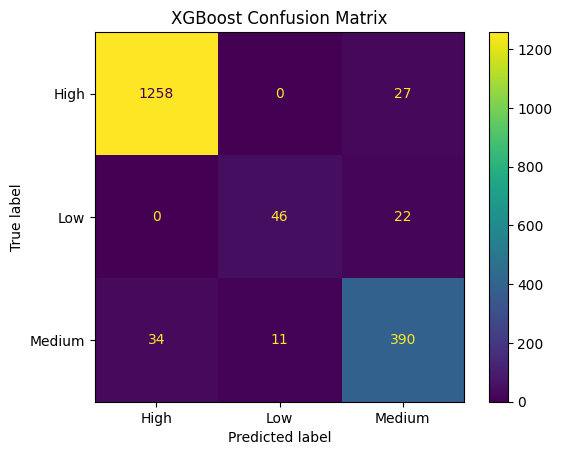

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.show()
